In [1]:
# WARNING FOR HELP WITH YFINANCE IN 2025 SEE THIS VIDEO : https://youtu.be/037_883wHGo?si=q1wuu8qXLMlXbeWd

import yfinance as yf  # Import the yfinance library for downloading financial data
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt  # Import importlib for reloading modules
from datetime import datetime
from pandas.tseries.offsets import DateOffset
import importlib  # Import importlib for reloading modules
import utils  # Import a custom module named utils
importlib.reload(utils)  # Reload the utils module to ensure it's updated

# List of asset symbols to download historical data for.
ptf_assets = []
ptf_assets = [
    "ISRG",        # Intuitive Surgical
    "SYK",         # Stryker Corporation
    "EL.PA",       # EssilorLuxottica 
    "VEEV",        # Veeva Systems Inc 
    "RMD",         # ResMed Inc.
    "DHR",         # Danaher Corporation
    "TXN",         # Texas Instruments
    "COH.AX",      # Cochlear Limited
    "PME.AX",      # Pro Medicus Limited
    "STMN.SW",     # Straumann Holding AG
    "7741.T",      # HOYA Corporation 
    "EQS.PA",      # Pharmagest Interactive SA
    "EW",          # Edwards Lifesciences Corporation
    "4543.T",      # Terumo Corporation
    "7747.T",      # Asahi Intecc Co., Ltd
    "GRMN",         # Garmin 
    "TMO",          # Thermo Fisher Scientific Inc
    #"EUZ.DE",        # Eckert (à voir)
    #"LMAT",          #Le Maître Vascular
    "NXU.DE",         #Nexus
    "SECT-B.ST",      #Sectra AB
    "7716.T",         #Nakanishi Inc
    #"2175.T"         #SMS.co
]

assets_to_analyse = ["SPY"]

start_date = datetime(2013, 12, 1)
end_date = datetime(2024, 12, 31)

start_date_market_cap = datetime(2013, 12, 1)
end_date_market_cap = datetime(2025, 4, 1)

# Télécharger les prix mensuels en incluant décembre 2009
monthly_price_data = yf.download(assets_to_analyse + ptf_assets, interval="1mo", start=start_date, end=end_date)["Close"]
monthly_price_data_market_cap = yf.download(assets_to_analyse + ptf_assets, interval="1mo", start=start_date_market_cap, end=end_date_market_cap)["Close"]

# Print a success message to confirm that data for all assets was imported
print("Monthly prices for all selected assets have been successfully imported.")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  21 of 21 completed
[*********************100%***********************]  21 of 21 completed

Monthly prices for all selected assets have been successfully imported.


In [94]:
from utils import TotalReturnIndexCalculator  # Import the TotalReturnIndexCalculator class from the utils module

# Initialize an instance of the TotalReturnIndexCalculator class
totalreturnindexcalculator = TotalReturnIndexCalculator()

# Initialize a dictionary to store the annual returns for each asset
monthly_returns_dict = {}
monthly_returns_dict_market_cap = {}

# Calculate the annual returns for each asset using monthly price data
for asset in (assets_to_analyse + ptf_assets):
    # Calculate annual simple returns for the current asset and store them in the dictionary
    monthly_returns_dict[asset] = totalreturnindexcalculator.monthly_simple_returns(monthly_price_data[asset])
    monthly_returns_dict_market_cap[asset] = totalreturnindexcalculator.monthly_simple_returns(monthly_price_data_market_cap[asset])

# Print a confirmation message to indicate successful calculation
print("Monthly returns for all assets have been successfully calculated and stored.")

Monthly returns for all assets have been successfully calculated and stored.


In [96]:
#Equally_Weighted_Ptf = []
#for i in range(0, len(monthly_returns_dict[ptf_assets[0]])):
    #Ptf_Return = 0
    #for asset in ptf_assets:
        #Ptf_Return += monthly_returns_dict[asset][i] / len(ptf_assets)    
    #Equally_Weighted_Ptf.append(Ptf_Return)

Equal_Cap_Assets = {asset: [1] for asset in ptf_assets}
for i in range(0, len(monthly_returns_dict[asset])):
    if (i + 1) % 3 == 0:
        Equal_Cap = 0
        for asset in ptf_assets:
            Equal_Cap += (Equal_Cap_Assets[asset][i] * (1 + monthly_returns_dict[asset][i])) / len(ptf_assets)
        for asset in ptf_assets:
            Equal_Cap_Assets[asset].append(Equal_Cap)     
    else:
        for asset in ptf_assets:
            Equal_Cap_Assets[asset].append(Equal_Cap_Assets[asset][i] * (1 + monthly_returns_dict[asset][i]))


Equal_Weighted_Ptf = []
Total_Equal_Cap = []

for i in range(0, len(Equal_Cap_Assets[asset])):
    Total = 0
    for asset in ptf_assets:
        Total += Equal_Cap_Assets[asset][i]
    Total_Equal_Cap.append(Total)

Total_Equal_Cap = pd.Series(Total_Equal_Cap)

Equally_Weighted_Ptf = totalreturnindexcalculator.monthly_simple_returns(Total_Equal_Cap)

In [98]:
Market_Cap_Assets = {} 
for asset in ptf_assets:
    ticker = yf.Ticker(asset)
    Market_Cap_Assets[asset] = ticker.info["marketCap"]
    for i in range(len(monthly_returns_dict_market_cap["SPY"])- 1, -1, -1):
        Market_Cap_Assets[asset] = Market_Cap_Assets[asset]/(monthly_returns_dict_market_cap[asset][i]+1)

for asset in ptf_assets:
    Market_Cap = [Market_Cap_Assets[asset]]
    for i in range(0, len(monthly_returns_dict[asset])):
        Market_Cap.append(Market_Cap[i] * (1 + monthly_returns_dict[asset][i]))
    Market_Cap_Assets[asset] = Market_Cap

Market_Weighted_Ptf = []
Total_Market_Cap = []

for i in range(0, len(Market_Cap_Assets[asset])):
    Total = 0
    for asset in ptf_assets:
        Total += Market_Cap_Assets[asset][i]
    Total_Market_Cap.append(Total)

Total_Market_Cap = pd.Series(Total_Market_Cap)

Market_Weighted_Ptf = totalreturnindexcalculator.monthly_simple_returns(Total_Market_Cap)

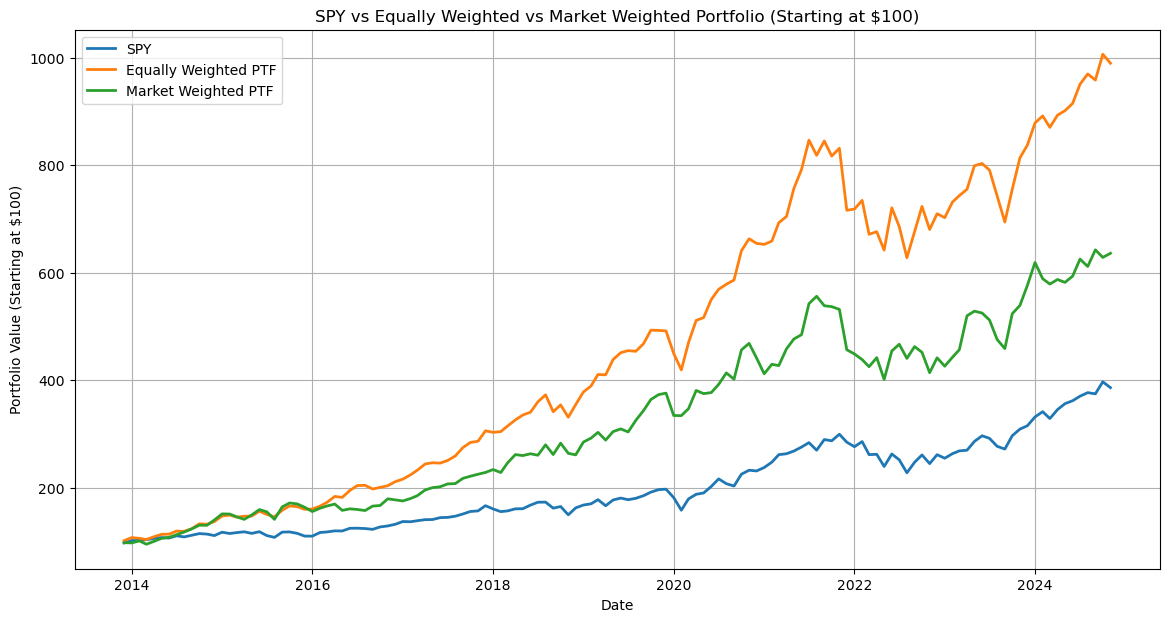

In [99]:
# Transformation des rendements mensuels en indices de performance
starting_value = 100
SPY_Index = [starting_value]
Equally_Weighted_Index = [starting_value]
Market_Weighted_Index = [starting_value]


for ret in monthly_returns_dict['SPY']:
    SPY_Index.append(SPY_Index[-1] * (1 + ret))
for ret in Equally_Weighted_Ptf:
    Equally_Weighted_Index.append(Equally_Weighted_Index[-1] * (1 + ret))
for ret in Market_Weighted_Ptf:
    Market_Weighted_Index.append(Market_Weighted_Index[-1] * (1 + ret))

# Création du DataFrame pour affichage
df_plot = pd.DataFrame({
    'SPY': SPY_Index[1:],
    'Equally Weighted PTF': Equally_Weighted_Index[1:],
    'Market Weighted PTF': Market_Weighted_Index[1:]
}, index=monthly_price_data.index[:len(SPY_Index)-1])

# Tracé du graphique
plt.figure(figsize=(14, 7))
plt.plot(df_plot.index, df_plot['SPY'], label="SPY", linewidth=2)
plt.plot(df_plot.index, df_plot['Equally Weighted PTF'], label="Equally Weighted PTF", linewidth=2)
plt.plot(df_plot.index, df_plot['Market Weighted PTF'], label="Market Weighted PTF", linewidth=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Portfolio Value (Starting at $100)')
plt.title('SPY vs Equally Weighted vs Market Weighted Portfolio (Starting at $100)')
plt.grid()
#plt.savefig("portfolio_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

In [100]:
if 'E_W_Ptf' not in monthly_returns_dict:
    monthly_returns_dict['E_W_Ptf'] = Equally_Weighted_Ptf
    assets_to_analyse.append('E_W_Ptf')

if 'M_W_Ptf' not in monthly_returns_dict:
    monthly_returns_dict['M_W_Ptf'] = Market_Weighted_Ptf
    assets_to_analyse.append('M_W_Ptf')
  
surplus = len(monthly_returns_dict['E_W_Ptf']) % 12 

monthly_price_data = {}
for asset in assets_to_analyse:
    monthly_price_data[asset] = [1]
    for ret in monthly_returns_dict[asset]:
        monthly_price_data[asset].append(monthly_price_data[asset][-1] * (1 + ret))
    monthly_price_data[asset] = pd.Series(monthly_price_data[asset])

In [104]:
from utils import TotalReturnIndexCalculator  # Import the TotalReturnIndexCalculator class from the utils module

# Initialize an instance of the TotalReturnIndexCalculator class
totalreturnindexcalculator = TotalReturnIndexCalculator()

# Initialize a dictionary to store the annual returns for each asset
annual_returns_dict = {}

# Calculate the annual returns for each asset using monthly price data
for asset in assets_to_analyse:
    # Calculate annual simple returns for the current asset and store them in the dictionary
    annual_returns_dict[asset] = totalreturnindexcalculator.annual_simple_returns(monthly_price_data[asset])

# Print a confirmation message to indicate successful calculation
print("Annual returns for all assets have been successfully calculated and stored.")

Annual returns for all assets have been successfully calculated and stored.


In [106]:
from utils import Calculator  # Import the Calculator class from the utils module

# Initialize an instance of the Calculator class
calculator = Calculator()

# Download T-Bill rates (expressed in annualized percentage points)
t_bill_data = yf.download("^IRX", interval="1d", start=pd.to_datetime(start_date) + DateOffset(months=1), end=end_date)["Close"]["^IRX"]

annual_avg = t_bill_data.groupby([t_bill_data.index.year]).mean()
monthly_avg = t_bill_data.groupby([t_bill_data.index.year, t_bill_data.index.month]).mean()

annual_t_bill_returns = list((annual_avg / 100))  # Convert to decimal
monthly_t_bill_returns = list((monthly_avg / 100))

monthly_rf_rates = [(1 + rate) ** (1/12) - 1 for rate in monthly_t_bill_returns]

rf = calculator.mean(monthly_rf_rates)

annual_excess_returns = {}
#monthly_excess_returns = {}
for asset in assets_to_analyse:
    annual_excess_returns_asset = []
    #monthly_excess_returns_asset = []
    for i in range(0, len(annual_returns_dict[asset])):
        annual_excess_returns_asset.append(annual_returns_dict[asset][i] - annual_t_bill_returns[i])
    annual_excess_returns[asset] = annual_excess_returns_asset
    #for j in range(0, len(monthly_returns_dict[asset])):
        #monthly_excess_returns_asset.append(monthly_returns_dict[asset][i] - monthly_t_bill_returns[i])
    #monthly_excess_returns[asset] = monthly_excess_returns_asset  

# Initialize dictionaries to store calculated metrics for each asset
mean_dict = {}  # Dictionary for arithmetic mean of returns
standard_deviation_dict = {}  # Dictionary for standard deviation of returns
sharpe_ratio_dict = {}  # Dictionary for Sharpe Ratio of returns

# Calculate metrics for each asset and store in corresponding dictionaries
for asset in assets_to_analyse:
    mean_dict[asset] = calculator.mean(annual_returns_dict[asset])  # Arithmetic mean of annual returns
    standard_deviation_dict[asset] = calculator.standard_deviation(annual_returns_dict[asset])  # Standard deviation of annual returns
    sharpe_ratio_dict[asset] = calculator.sharpe_ratio(annual_excess_returns[asset])  # Sharpe Ratio using the risk-free rate

# Create a DataFrame to display the calculated metrics for each asset
df = pd.DataFrame({
    "Asset": list(mean_dict.keys()),  # List of asset names
    "Arithmetic Mean": list(mean_dict.values()),  # Arithmetic mean of returns for each asset
    "Standard Deviation": list(standard_deviation_dict.values()),  # Standard deviation of returns for each asset
     "Risk Free Rate": (rf),  # Risk-free rate, applied to the entire table
     "Sharpe Ratio": list(sharpe_ratio_dict.values())  # Sharpe Ratio for each asset
})

# Print the DataFrame with calculated metrics for each asset
print(df)

[*********************100%***********************]  1 of 1 completed

     Asset  Arithmetic Mean  Standard Deviation  Risk Free Rate  Sharpe Ratio
0      SPY         0.141219            0.148559        0.001312      0.856992
1  E_W_Ptf         0.244055            0.163538        0.001312      1.354064
2  M_W_Ptf         0.195880            0.161603        0.001312      1.108836


In [108]:
geometric_mean_dict = {}  # Dictionary for geometric mean of returns
for asset in assets_to_analyse:
    geometric_mean_dict[asset] = calculator.geometric_mean(annual_returns_dict[asset])  # Geometric mean of annual returns

# Create a DataFrame to display the calculated metrics for each asset
df = pd.DataFrame({
    "Asset": list(mean_dict.keys()),  # List of asset names
    "Geometric Mean": list(geometric_mean_dict.values()),  # Geometric mean of returns for each asset
})

# Print the DataFrame with calculated metrics for each asset
print(df)

     Asset  Geometric Mean
0      SPY        0.130612
1  E_W_Ptf        0.231654
2  M_W_Ptf        0.183129


     Asset      Beta  P-Value Beta  CAPM Expected Return
0      SPY  1.000000  0.000000e+00              0.011226
1  E_W_Ptf  0.842438  2.127826e-35              0.009664
2  M_W_Ptf  0.632225  1.079418e-10              0.007580


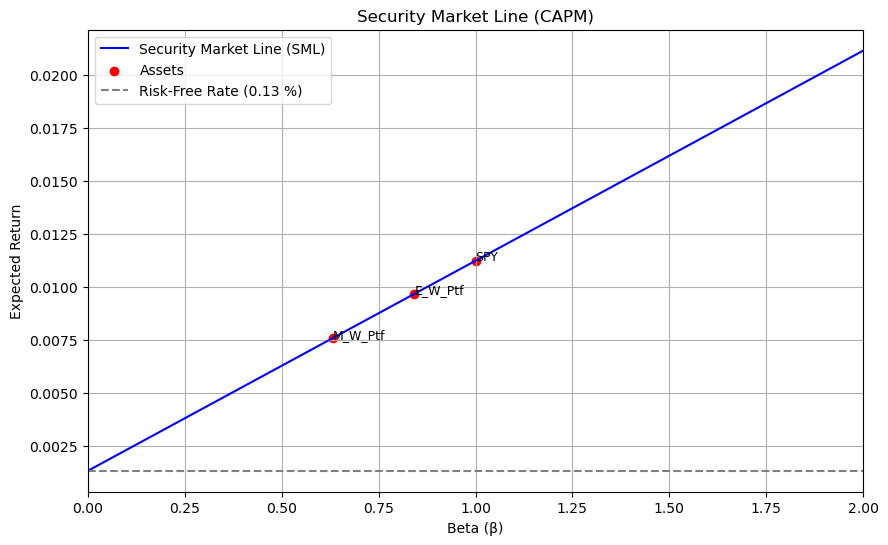

In [110]:
from utils import Capm  # Import the Capm class from the 'utils' module.

# Initialize an instance of the Capm class
capm = Capm()  # Create an object of the Capm class to access its methods.

# Initialize a dictionary to store CAPM metrics for each asset
capm_dict = {}  # This dictionary will hold CAPM metrics for all assets.

# Calculate CAPM metrics for each asset in comparison to the SPY (used as the market benchmark)
for asset in assets_to_analyse:  
    # For each asset in the list of assets:
    # - Perform CAPM regression using:
    #   1. The asset's annual returns (`annual_returns_dict[asset]`),
    #   2. The market benchmark's annual returns (`annual_returns_dict['SPY']`),
    #   3. The risk-free rate (`rf`).
    capm_dict[asset] = capm.regression(monthly_returns_dict[asset], monthly_returns_dict['SPY'], rf)

# Create a DataFrame to display the calculated CAPM metrics for each asset
df = pd.DataFrame({  # Create a pandas DataFrame from the CAPM dictionary.
    "Asset": list(capm_dict.keys()),  # Add a column for asset names (keys of the dictionary).
    "Beta": [v['beta'] for v in capm_dict.values()],  # Extract the beta coefficient for each asset.
    "P-Value Beta": [v['p_beta'] for v in capm_dict.values()],  # Extract the p-value of beta.
    "CAPM Expected Return": [v['capm_expected_return'] for v in capm_dict.values()],  # Extract the expected return.
})

# Print the DataFrame with CAPM metrics for each asset
print(df)  # Display the DataFrame containing the CAPM results for all assets.

mean_market_return = calculator.mean(monthly_returns_dict["SPY"]) 
# Approximate the mean market return using the average return of the SPY (benchmark).

# Use the Capm class's draw_sml method to plot the Security Market Line (SML)
capm.draw_sml(
    rf,  # Risk-free rate.
    mean_market_return,  # Mean market return (SPY in this case).
    [v['beta'] for v in capm_dict.values()],  # List of beta values for all assets.
    [v['capm_expected_return'] for v in capm_dict.values()],  # List of expected returns for all assets.
    list(capm_dict.keys())  # List of asset names for labeling the plot.
)

     Asset  Capm Expected Return         Alpha  P-Value Alpha  \
0      SPY              0.011226 -2.168404e-18   8.960612e-21   
1  E_W_Ptf              0.009664  8.813102e-03   8.656858e-05   
2  M_W_Ptf              0.007580  7.883925e-03   5.119582e-02   

   Alpha Adjusted Expected Return  
0                        0.011226  
1                        0.018477  
2                        0.015464  


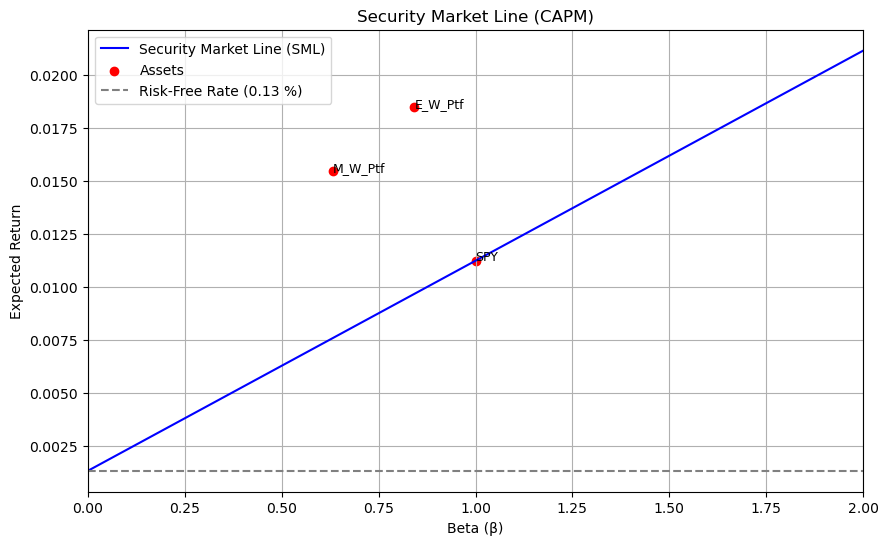

In [112]:
# Create a DataFrame to display the calculated CAPM metrics for each asset
df = pd.DataFrame({  # Initialize a pandas DataFrame with columns based on the CAPM results.
    "Asset": list(capm_dict.keys()),  # Add a column for asset names (keys from the CAPM dictionary).
    "Capm Expected Return": [v['capm_expected_return'] for v in capm_dict.values()],  
    # Add a column for the expected return of each asset based on the CAPM formula.
    "Alpha": [v['alpha'] for v in capm_dict.values()],  
    # Add a column for alpha values (excess return not explained by the market).
    "P-Value Alpha": [v['p_alpha'] for v in capm_dict.values()],
    # Add a column for p-values of alpha (statistical significance of alpha).
    "Alpha Adjusted Expected Return": [v['alpha_adjusted_expected_return'] for v in capm_dict.values()]
    # Add a column for the adjusted expected return that includes both CAPM expected return and alpha.
})

# Print the DataFrame with CAPM metrics for each asset
print(df)  # Display the DataFrame to summarize the calculated CAPM metrics for all assets.

# Use the Capm class's draw_sml method to plot the Security Market Line (SML)
capm.draw_sml(
    rf,  # Risk-free rate: a required parameter for plotting the SML.
    mean_market_return,  # Mean market return: typically derived from SPY as a proxy for the market portfolio.
    [v['beta'] for v in capm_dict.values()],  # Extract beta values for all assets for the SML plot.
    [v['alpha_adjusted_expected_return'] for v in capm_dict.values()],  
    # Use alpha-adjusted expected returns for plotting points on the SML.
    list(capm_dict.keys())  # Provide the list of asset names for labeling the points on the SML plot.
)